In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
data = pd.read_csv('train.csv')

In [4]:
def Nrep(x):
    nrep = x.isna().sum()
    return nrep
    
null_rep = data.apply(Nrep)
null_rep

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
msng_coln_names = list(null_rep[null_rep>0].index)
msng_coln_names

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
msng_colns = data[msng_coln_names].isna().sum()
msng_colns

##### OR ####

# msng_colns = null_rep[null_rep>0]
# msng_colns

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
for col in msng_coln_names:
    if data[col].dtype == object :
        data[col].fillna('tmp',inplace=True)
null_rep = data.apply(Nrep)
msng_coln_names = list(null_rep[null_rep>0].index)
print(msng_coln_names)
msng_colns = data[msng_coln_names].isna().sum()
msng_colns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

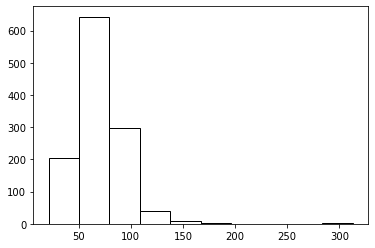

In [8]:
plt.hist(data.LotFrontage,color='white',edgecolor='black')

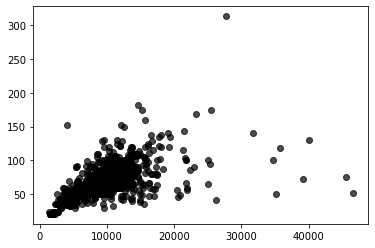

In [10]:
plt.scatter(data.LotArea[data.LotArea<50000],data.LotFrontage[data.LotArea<50000], alpha = .7, c='k')
plt.show()

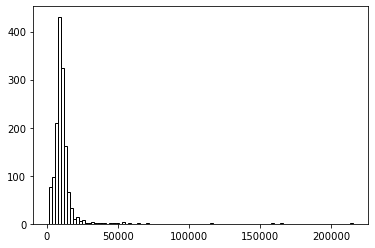

In [9]:
plt.hist(data.LotArea,bins=100,color='white',edgecolor='black')
plt.xlim = (0,200000)
plt.ylim = (0,1400)
plt.show()

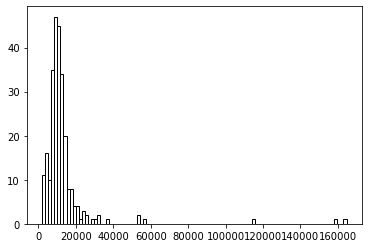

In [10]:
plt.hist(data.loc[data['LotFrontage'].isna(),'LotArea'],bins=100,color='white',edgecolor='black')
plt.xlim = (0,200000)
plt.ylim = (0,1400)
plt.show()

In [11]:
data.LotFrontageImp = data.LotFrontage

x = data[['LotFrontage','LotArea']]

imputer = IterativeImputer(max_iter=100,random_state=42)

# data['LotFrontageImp11'] = imputer.fit_transform(data['LotFrontage'].values.reshape(-1,1))
y = imputer.fit_transform(x)

data['LotFrontageImp'] = [item[0] for item in y]
print(data.head())

# c=0
# d=0
# for i in range(0,len(data.LotFrontageImp)):
#     print(data.LotFrontageImp[i],data.LotFrontageImp11[i])
#     if data.LotFrontageImp[i] == data.LotFrontageImp11[i]:
#         c+=1
#     else:
#         d+=1

# print(c,d)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   tmp      Reg   
1   2          20       RL         80.0     9600   Pave   tmp      Reg   
2   3          60       RL         68.0    11250   Pave   tmp      IR1   
3   4          70       RL         60.0     9550   Pave   tmp      IR1   
4   5          60       RL         84.0    14260   Pave   tmp      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    tmp   tmp         tmp       0      2   2008   
1         Lvl    AllPub  ...    tmp   tmp         tmp       0      5   2007   
2         Lvl    AllPub  ...    tmp   tmp         tmp       0      9   2008   
3         Lvl    AllPub  ...    tmp   tmp         tmp       0      2   2006   
4         Lvl    AllPub  ...    tmp   tmp         tmp       0     12   2008   

  SaleType  SaleCondition  SalePrice  LotFrontageImp  
0       WD         Normal

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [12]:
test = data[['LotFrontage', 'LotFrontageImp']]
null_rep = test.apply(Nrep)
null_rep

LotFrontage       259
LotFrontageImp      0
dtype: int64

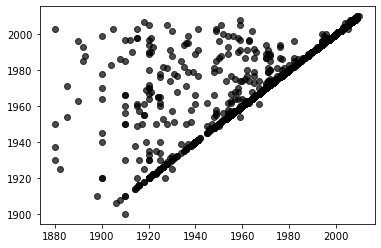

In [13]:
plt.scatter(data.YearBuilt,data.GarageYrBlt, alpha = .7, c='k')
plt.show()

In [13]:
for i in range(0,len(data.GarageYrBlt)):
    if np.isnan(data.GarageYrBlt[i]):
        data.GarageYrBlt[i] = data.YearBuilt[i]
print(data.GarageYrBlt.isna().sum())

0


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
test = data[msng_coln_names].apply(Nrep)
test

LotFrontage    259
MasVnrArea       8
GarageYrBlt      0
dtype: int64

In [16]:
vnr = data.loc[data['MasVnrArea'].isna(),['MasVnrType','MasVnrArea']]
print(vnr)

     MasVnrType  MasVnrArea
234         tmp         NaN
529         tmp         NaN
650         tmp         NaN
936         tmp         NaN
973         tmp         NaN
977         tmp         NaN
1243        tmp         NaN
1278        tmp         NaN


In [17]:
data.loc[data['MasVnrArea'].isna(),'MasVnrArea'] = 0
print(data['MasVnrArea'].isna().sum())

0


In [18]:
test = data[msng_coln_names].apply(Nrep)
test

LotFrontage    259
MasVnrArea       0
GarageYrBlt      0
dtype: int64

In [19]:
data.drop(columns='LotFrontage',inplace=True)
print(data.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0        1          60       RL     8450   Pave   tmp      Reg         Lvl   
1        2          20       RL     9600   Pave   tmp      Reg         Lvl   
2        3          60       RL    11250   Pave   tmp      IR1         Lvl   
3        4          70       RL     9550   Pave   tmp      IR1         Lvl   
4        5          60       RL    14260   Pave   tmp      IR1         Lvl   
...    ...         ...      ...      ...    ...   ...      ...         ...   
1455  1456          60       RL     7917   Pave   tmp      Reg         Lvl   
1456  1457          20       RL    13175   Pave   tmp      Reg         Lvl   
1457  1458          70       RL     9042   Pave   tmp      Reg         Lvl   
1458  1459          20       RL     9717   Pave   tmp      Reg         Lvl   
1459  1460          20       RL     9937   Pave   tmp      Reg         Lvl   

     Utilities LotConfig  ... Poo

In [21]:
data.to_csv('cleaned_train.csv',index=False)